# Chapter 7. Using R and Python in Julia

I recently faced an efficiency challenge in my data analysis pipeline: Python and R were too slow, even with parallelization. To address this, I began learning Julia.

Surprisingly, I discovered a method to integrate all major data analysis languages in a single notebook. Now we can seamlessly combine machine learning (in Python), fast data preparation (using Julia), and result visualization with `ggplot2` (supported in R).

## Prerequisites

- Python, R, Julia installed
- Jupyter Notebook installed
- Install Julia kernel:
    - Enter Julia REPL
    - For example, we want to add a Julia kernel in Jupyter using multi-threads: `installkernel("Julia (4 threads)", env=Dict("JULIA_NUM_THREADS"=>"4"))`
- Install `PyCall` and `RCall` in Julia


In [10]:
import Pkg; Pkg.add("RCall"); Pkg.add("PyCall")

# Import libraries
using RCall, PyCall, DataFrames

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


## Using R in Julia

### 1. Using R-functions:

In [16]:
R"""
library(ggplot2)
"""

jmtcars = reval("mtcars")
first(jmtcars, 5)

5-element Vector{Any}:
 RObject{RealSxp}
 [1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

 RObject{RealSxp}
 [1] 6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4

 RObject{RealSxp}
 [1] 160.0 160.0 108.0 258.0 360.0 225.0 360.0 146.7 140.8 167.6 167.6 275.8
[13] 275.8 275.8 472.0 460.0 440.0  78.7  75.7  71.1 120.1 318.0 304.0 350.0
[25] 400.0  79.0 120.3  95.1 351.0 145.0 301.0 121.0

 RObject{RealSxp}
 [1] 110 110  93 110 175 105 245  62  95 123 123 180 180 180 205 215 230  66  52
[20]  65  97 150 150 245 175  66  91 113 264 175 335 109

 RObject{RealSxp}
 [1] 3.90 3.90 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 3.92 3.07 3.07 3.07 2.93
[16] 3.00 3.23 4.08 4.93 4.22 3.70 2.76 3.15 3.73 3.08 4.08 4.43 3.77 4.22 3.62
[31] 3.54 4.11


### 2. Using R codes:

┌ Warning: RCall.jl: 
│ Attaching package: ‘dplyr’
│ 
│ The following objects are masked from ‘package:stats’:
│ 
│     filter, lag
│ 
│ The following objects are masked from ‘package:base’:
│ 
│     intersect, setdiff, setequal, union
│ 
└ @ RCall ~/.julia/packages/RCall/0ggIQ/src/io.jl:172


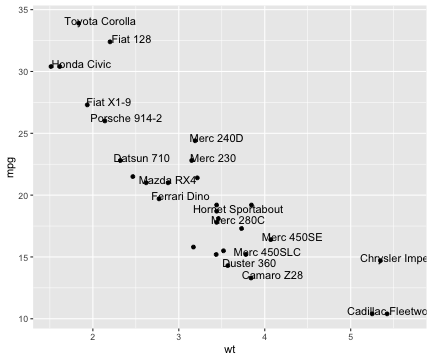

RObject{VecSxp}


In [5]:
R"""
library(ggplot2)
library(dplyr)

data=head(mtcars, 30)
 
# 1/ add text with geom_text, use nudge to nudge the text
ggplot(data, aes(x=wt, y=mpg)) +
  geom_point() + # Show dots
  geom_text(
    label=rownames(data), 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T
  )
"""

## Using Python in Julia

### 1. Using Python functions

In [19]:
os = pyimport("os")
os.listdir()

9-element Vector{String}:
 "6.visualize.jl.ipynb"
 "5.models.jl.ipynb"
 "res"
 "5.2.models.jl.ipynb"
 "1.installation.basics.md"
 "7.r.and.python.in.julia.jl.ipynb"
 "4.pipeline.tools.jl.ipynb"
 "3.transform.calculate.jl.ipynb"
 "2.data.loading.selection.jl.ipynb"

### 2. Using Python code blocks

In [24]:
py"""
print("This is Python")
"""

This is Python


    

## Alternatives
- 2Sigma, BeakerX, https://github.com/twosigma/beakerx